In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 

file1_to_load = "Resources/athlete_events.csv"
file2_to_load = "Resources/noc_regions.csv"

# Read Athlete Events File and store into Pandas data frame
athlete_events = pd.read_csv(file1_to_load)
athlete_country = pd.read_csv(file2_to_load)

athlete_events.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [49]:
athlete_country.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [81]:
#merge the 
athlete_data=pd.merge(athlete_events,athlete_country, on='NOC' , how='inner')


Text(0.5, 1.0, 'Count of Players in Winter Olympics by Gender')

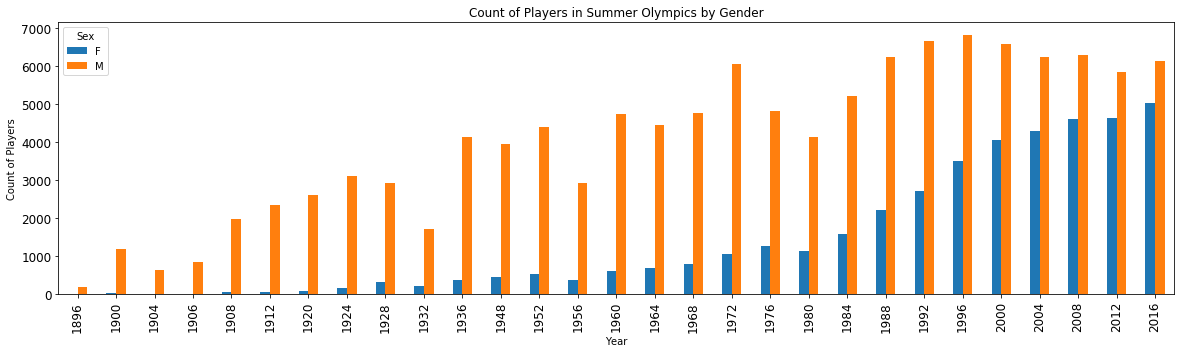

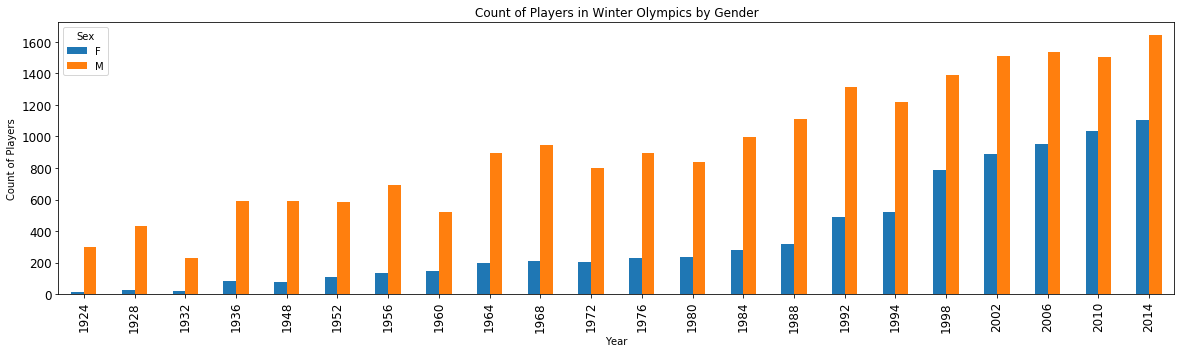

In [59]:
# Gender Distribution by Year and Season

Gender= athlete_data[["Name","Sex","Age","Year","Season"]].drop_duplicates()

Gender_Summer = Gender[Gender.Season=='Summer']
Gender_Winter = Gender[Gender.Season=='Winter']



Gender_Summer = Gender_Summer.groupby(['Year','Sex','Season'], as_index=False)['Name'].count()
Gender_Winter = Gender_Winter.groupby(['Year','Sex','Season'], as_index=False)['Name'].count()


ds=Gender_Summer.pivot(index='Year', columns='Sex', values='Name').plot(kind='bar',figsize=(20,5), fontsize=12)
ds.set_xlabel("Year")
ds.set_ylabel("Count of Players")
ds.set_title("Count of Players in Summer Olympics by Gender")


dw=Gender_Winter.pivot(index='Year', columns='Sex', values='Name').plot(kind='bar',figsize=(20,5), fontsize=12)
dw.set_xlabel("Year")
dw.set_ylabel("Number of Players")
dw.set_title("Number of Players in Winter Olympics by Gender")




Text(0.5, 1.0, 'Gold Medals Won in Olympics')

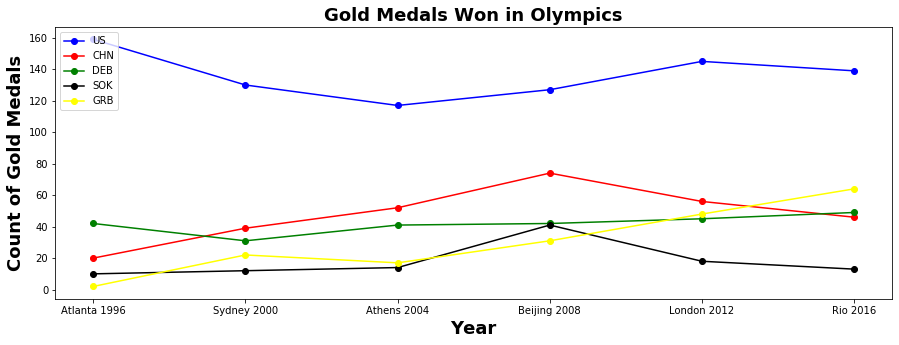

In [151]:
# Medal counts by Country and Year

Medal= athlete_data[["region","Year","Medal","Season"]]


US_Summer_Gold = Medal[(Medal['Season'] =='Summer') & (Medal['Medal'] =='Gold') & (Medal['region'] =='USA') 
                    & (Medal['Year'] >=1996)]

CHN_Summer_Gold = Medal[(Medal['Season'] =='Summer') & (Medal['Medal'] =='Gold') & (Medal['region'] =='China') 
                    & (Medal['Year'] >=1996)]

GRB_Summer_Gold = Medal[(Medal['Season'] =='Summer') & (Medal['Medal'] =='Gold') & (Medal['region'] =='UK') 
                    & (Medal['Year'] >=1996)]

RUS_Summer_Gold = Medal[(Medal['Season'] =='Summer') & (Medal['Medal'] =='Gold') & (Medal['region'] =='Russia') 
                    & (Medal['Year'] >=1996)]

DEB_Summer_Gold = Medal[(Medal['Season'] =='Summer') & (Medal['Medal'] =='Gold') & (Medal['region'] =='Germany') 
                    & (Medal['Year'] >=1996)]

SOK_Summer_Gold = Medal[(Medal['Season'] =='Summer') & (Medal['Medal'] =='Gold') & (Medal['region'] =='South Korea') 
                    & (Medal['Year'] >=1996)]


Winter_Gold = Medal[(Medal['Season'] =='Winter') & (Medal['Medal'] =='Gold') & (Medal['Year'] >=1996)]



US_Summer_Gold = US_Summer_Gold.groupby(['region','Year'], as_index=False)['Medal'].count()
CHN_Summer_Gold = CHN_Summer_Gold.groupby(['region','Year'], as_index=False)['Medal'].count()
GRB_Summer_Gold = GRB_Summer_Gold.groupby(['region','Year'], as_index=False)['Medal'].count()
DEB_Summer_Gold = DEB_Summer_Gold.groupby(['region','Year'], as_index=False)['Medal'].count()
SOK_Summer_Gold = SOK_Summer_Gold.groupby(['region','Year'], as_index=False)['Medal'].count()

fig = plt.figure()
ax = plt.axes()

x=US_Summer_Gold['Year'].values
y=US_Summer_Gold['Medal'].values
z=CHN_Summer_Gold['Medal'].values
a= DEB_Summer_Gold['Medal'].values
b=SOK_Summer_Gold['Medal'].values
c=GRB_Summer_Gold['Medal'].values
# ax.plot(x, y)
# ax.plot(x, z)
# ax.plot(x, a)
# ax.plot(x, b)
# ax.plot(x, c)


plt.plot(x, y, marker ='o', color='blue', label="US")
plt.plot(x, z, marker='o', color='red', label="CHN")
plt.plot(x, a, marker='o', color='green', label="DEB")
plt.plot(x, b, marker='o', color='black', label="SOK")
plt.plot(x, c, marker='o', color='yellow', label="GRB")

fig.set_figheight(5)
fig.set_figwidth(15)

#ax.grid(linestyle='-', linewidth='0.5', color='grey')

plt.legend(loc="upper left")

labels = ['Atlanta 1996', 'Sydney 2000', 'Athens 2004','Beijing 2008','London 2012','Rio 2016']

plt.xticks(x, labels)

ax.set_xlabel('Year',fontsize=18,fontweight='bold')
ax.set_ylabel("Count of Gold Medals",fontsize=18,fontweight='bold')
ax.set_title("Gold Medals Won in Olympics",fontsize=18,fontweight='bold')

# plt.legend(loc="Upper right")


In [114]:
plt.savefig("Medals.png")


<Figure size 432x288 with 0 Axes>